# WE DID NOT DO B IN CLASS

# In Class Assignment 1

Use the given 1-nearest neighbor classifier which estimates a penguins `species` by observing its `bill_depth_mm` and `bill_length_mm` to:
- Plot a confusion matrix which shows the performance of your classifier
- In a few sentences, explain whether this confusion matrix accurately represents the performance of the classifier on **new** penguins (those the classifier hasn't trained on).  Why or why not?  How might you fix this issue?

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(how='any', inplace=True)

In [2]:
k = 1
x_feat_list = ['bill_depth_mm', 'bill_length_mm']
y_feat = 'species'

x = df_penguin.loc[:, x_feat_list].values
y_true = df_penguin.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
knn_classifier.fit(x, y_true)

# estimate each penguin's species
y_pred = knn_classifier.predict(x)

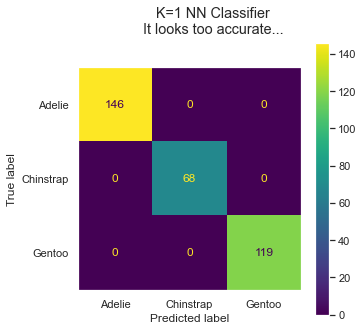

In [3]:
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)

conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))

sns.set(font_scale=1)
conf_mat_disp.plot()
plt.suptitle("K=1 NN Classifier\nIt looks too accurate...")

plt.gcf().set_size_inches(5, 5)

# seaborn turns on grid by default
plt.grid(False)

## Response:
The above confusion matrix is too accurate because they are predicting the already trained set.

You can use cross validation and measure the performance on new sample rather than the trained set.


In [4]:
from sklearn.metrics import confusion_matrix

def get_acc_sens_spec(y_true, y_pred, verbose=True):
    """ computes sensitivity & specificity (assumed binary inputs)

    Args:
        y_true (np.array): binary ground truth per trial
        y_pred (np.array): binary prediction per trial

    Returns:
        acc (float): accuracy
        sens (float): sensitivity
        spec (float): specificity
    """
    # line below stolen from sklearn confusion_matrix documentation
    tn, fp, fn, tp = confusion_matrix(y_true.astype(bool),
                                      y_pred.astype(bool),
                                      labels=(0, 1)).ravel()

    # compute sensitivity
    if tp + fn:
        sens = tp / (tp + fn)
    else:
        sens = np.nan

    # compute specificity
    if tn + fp:
        spec = tn / (tn + fp)
    else:
        spec = np.nan
        
    # compute acc
    acc = (tp + tn) / (tn + fp + fn + tp)

    return acc, sens, spec

In [ ]:
# 'secret' slide: generate icbm data from ground truth
import pandas as pd
import numpy as np

# total samples
n = int(1e6)

# prior prob of icbm event
prior = .01

# false alarm and detection (sensitivity) rates
fa_detect = [(.1, .99), 
             (.5, .95), 
             (.8, 1), 
             (.07, .95)]

# sample n icbm events
rng = np.random.default_rng(seed=0)
icbm = rng.random(n) < prior

# init dataframe
df_icbm = pd.DataFrame({'icbm': icbm})

for test_idx, (fa, detect) in enumerate(fa_detect):
    pred = np.empty_like(icbm)
    
    # get predictions (depend on icbm state)
    pred[icbm] = np.random.rand(icbm.sum()) < detect
    pred[~icbm] = np.random.rand((~icbm).sum()) < fa
    
    # store predictions
    df_icbm[f'alarm{test_idx}'] = pred
    
df_icbm.to_csv('icbm.csv', index=False)

## Intercontinental Ballistic Missile (ICBM)

In [ ]:
df_icbm = pd.read_csv('icbm.csv')
df_icbm.head()

In [ ]:
df_performance = pd.DataFrame()
for idx in range(4):
    alarm = f'alarm{idx}'
    
    # get truth / predict for alarm
    truth = df_icbm.loc[:, 'icbm']
    pred = df_icbm.loc[:, alarm]
    
    # build dataframe of accuracy, sensitivity and specificity
    acc, sens, spec = get_acc_sens_spec(y_true=truth, y_pred=pred)
    df_performance.loc[alarm, 'accuracy'] = acc
    df_performance.loc[alarm, 'sensitivity'] = sens
    df_performance.loc[alarm, 'specificity'] = spec
    
df_performance

## In Class Exercise 3

Using the values above (and maybe other operations on the dataframe too) select which of the four alarm systems is most appropriate to detect ICBMs.  Provide an explanation which is easily understood by a non-technical reader.

Is there any other information you'd need to make this decision?

## Response:
The most appropriate alarm clock to detect ICBMs is alarm3 because it has the highest accuracy rate of 0.93 with high sensitivity (0.95) and specificity (0.93) rates. 

Other information that I would need is the type of system that the alarm will be connected to and the frquency of missile events in that location.